# Hearthstone example

**Source:** [hsreplay](hsreplay.net) (downloaded May 3rd, 2021). 

## Helpful functions

In [1]:
import copy 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import linprog

import nashpy

# this module contains the data
import hst 

In [2]:
def solve_zerosum_with_linprog(U):
    '''solve_zerosum_with_linprog(): Solve a zero sum game using linear programming
    
        INPUT: U (k*k square matrix), payoffs in zero sum game (opponent gets -U.T)
        OUTPUT: alpha (k-vector) of probability weights for each action (the symmetric equilibrium)
    '''
    k, k2 = U.shape
    assert k == k2, f'Input matrix must be square, got {k}*{k2}'

    oo = np.zeros((1,k))
    ii = np.ones((1,k))

    # objective: c = [-1, 0, 0, ..., 0]
    c = np.insert(oo, 0, -1.0) # insert -1 in front (pos = index 0)
    
    # inequality constraints A*x <= b
    # top = [ 1 ...
    #         1 -1*A.Tl
    #         1  ...  ]
    # bot = [ 0 -1 0 0 
    #         0 0 -1 0 
    #         0 0 0 -1]
    top  = np.hstack( (ii.T, -1*U.T) )
    bot  = np.hstack( (oo.T, -1*np.eye(k)) )
    A_ub = np.vstack((top, bot))
    
    b_ub = np.zeros((1, 2*k))
    b_ub = np.matrix(b_ub)
    
    # contraints Ax = b
    # A = [0, 1, 1, ..., 1]
    A = np.matrix(np.hstack((0, np.ones((k,)))))
    b = 1.0 # just one condition so scalar 

    # v and alpha must be non-negative
    bounds = [(0,None) for i in range(k+1)]

    # call the solver
    sol = linprog(c=c, A_ub=A_ub, b_ub=b_ub, A_eq=A, b_eq=b)
    
    # remove the first element: just return the Nash EQ 
    alpha = sol.x[1:]
    return alpha

# Read data

In [3]:
dat, playrates = hst.read_data()

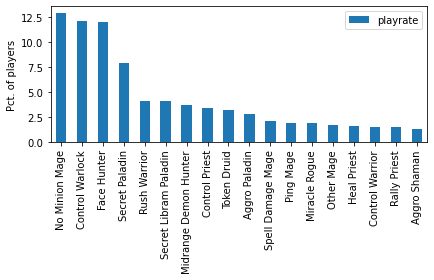

In [4]:
ax=playrates.plot.bar(ylabel='Pct. of players'); 
ax.set_xticklabels(playrates.deck); 
plt.tight_layout(); 

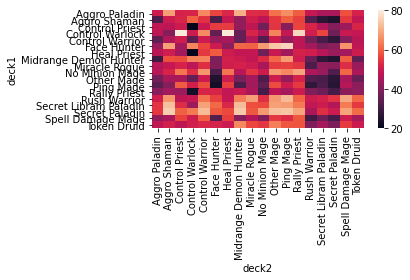

In [5]:
rows = dat.index.get_level_values('deck1')
cols = dat.columns
decks = rows
sns.heatmap(dat, xticklabels=cols, yticklabels=rows); 
plt.tight_layout(); 

In [6]:
U1 = dat.values

In [7]:
decks

Index(['Aggro Paladin', 'Aggro Shaman', 'Control Priest', 'Control Warlock',
       'Control Warrior', 'Face Hunter', 'Heal Priest',
       'Midrange Demon Hunter', 'Miracle Rogue', 'No Minion Mage',
       'Other Mage', 'Ping Mage', 'Rally Priest', 'Rush Warrior',
       'Secret Libram Paladin', 'Secret Paladin', 'Spell Damage Mage',
       'Token Druid'],
      dtype='object', name='deck1')

In [8]:
num_decks = len(decks)
unis = 1./num_decks * np.ones((num_decks,))
tab = pd.DataFrame(zip(decks, U1 @ unis), columns=['deck', 'x']).set_index('deck')
tab

,x
deck,
Aggro Paladin,56.090556
Aggro Shaman,46.012778
Control Priest,46.697222
Control Warlock,53.682778
Control Warrior,41.313889
Face Hunter,55.197778
Heal Priest,46.886667
Midrange Demon Hunter,48.797222
Miracle Rogue,47.976667


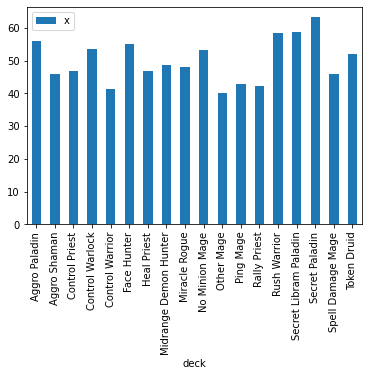

In [9]:
tab.plot(kind='bar'); 